# Pytorch를 사용한 QSAR 모델 구축(Prediction)

* python==3.6
* deepchem==2.4.0
* Rdkit==1.1.6
* torch==1.6.0 

Install deepchem library

In [ ]:
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3490  100  3490    0     0  15240      0 --:--:-- --:--:-- --:--:-- 15307


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
all packages are already installed


# conda environments:
#
base                  *  /root/miniconda
                         /usr/local



In [ ]:
!pip install --pre deepchem

Processing /root/.cache/pip/wheels/50/ed/e1/d594586392caa88d68243aebb9c6f83dbe4792c1ef4190d665/deepchem-2.4.0rc1.dev20200929001034-cp36-none-any.whl
     |████████████████████████████████| 6.8 MB 4.3 MB/s 


In [ ]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge python=3.6
!time conda install -q -y -c conda-forge rdkit

--2020-09-29 00:40:25--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-09-29 00:40:25--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | / - failed with 

In [ ]:
import deepchem as dc
dc.__version__

'2.4.0-rc1.dev'

In [ ]:
!python --version

Python 3.6.11


In [ ]:
import torch
torch.__version__

'1.6.0+cu101'

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem

# Pytorch 사용한 QSAR 모델 구축





In [ ]:
import torch
torch.__version__

'1.6.0+cu101'

## load to data

In [ ]:
!wget https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv

--2020-09-29 00:41:38--  https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96699 (94K) [text/plain]
Saving to: ‘delaney-processed.csv.3’

delaney-processed.c 100%[===================>]  94.43K  --.-KB/s    in 0.02s   

2020-09-29 00:41:38 (4.90 MB/s) - ‘delaney-processed.csv.3’ saved [96699/96699]



In [ ]:
#파이썬에서 데이터를 다루기 위한 라이브러리들
import numpy as np
import pandas as pd
#파이썬에서 시각화를 수행해주는 라이브러리
import matplotlib.pyplot as plt
#AI framework torch와 torch에 구현되어있는 모델 구축에 필요한 함수 사용
import torch
import torch.nn as nn
#표준화를 수행하기 위한 라이브러리
from sklearn.preprocessing import StandardScaler

#데이터 분할을 하기 위한 라이브러리
from sklearn.model_selection import train_test_split
#판다스 데이터프레임으로 데이터 불러오기 
data = pd.read_csv("delaney-processed.csv")
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127
Compound ID,Amigdalin,Fenfuram,citral,Picene,Thiophene,benzothiazole,"2,2,4,6,6'-PCB",Estradiol,Dieldrin,Rotenone,2-pyrrolidone,2-Chloronapthalene,1-Pentene,Primidone,Tetradecane,2-Chloropropane,2-Methylbutanol,Benzonitrile,Diazinon,2-Undecanol,"2,2',3,4,6-PCB",Lenacil,Phorate,Phenacetin,Dinitramine,1-Heptanol,Theophylline,Butethal,"P,P'-DDE",Methyl octanoate,"1,4-Diethylbenzene",Terbufos,Phenmedipham,"1,1-Dichloroethylene",1-Methylfluorene,Valeraldehyde,Diphenylamine,Fenothiocarb,Piperophos,1-Iodoheptane,...,Chloroethane,Mefluidide,Piperine,cis-2-Pentene,thiofanox,Cyclooctyl-5-spirobarbituric acid,butacarb,Eriodictyol,Benzophenone,Eicosane,hydrazobenzene,2-Ethyl-1-butanol,4-hydroxypyridine,"cis 1,2-Dichloroethylene",Methylcyclopentane,4-Methyl-2-pentanol,RTI 11,"2,2-Dimethylpropanol",Triadimefon,Isocarboxazid,Propylene,Dichlorophen,Desmedipham,Anthraquinone,2-Octanol,Oxycarboxin,Butylbenzene,parabanic acid,Abate,Chlorthalidone,Isobutyl acetate,"2,2,3-Trimethylbutane","2,3,3',4,4'6-PCB",Phthalonitrile,m-Nitrotoluene,halothane,Oxamyl,Thiometon,2-Methylbutane,Stirofos
ESOL predicted log solubility in mols per litre,-0.974,-2.885,-2.579,-6.618,-2.232,-2.733,-6.545,-4.138,-4.533,-5.246,0.243,-4.063,-2.01,-1.897,-5.45,-1.585,-1.027,-2.03,-3.989,-3.096,-6.627,-3.355,-3.747,-2.342,-4.479,-1.751,-1.452,-1.974,-6.553,-2.608,-3.633,-4.367,-4.229,-1.939,-4.478,-1.103,-3.857,-3.297,-4.637,-3.904,...,-1.165,-3.165,-3.659,-2.076,-2.7,-2.284,-4.642,-3.152,-3.612,-7.576,-3.492,-1.381,-1.655,-1.561,-2.452,-1.308,-3.125,-1.011,-4.132,-2.251,-1.235,-4.924,-4.182,-3.34,-2.033,-2.169,-3.585,1.091,-6.678,-2.564,-1.463,-2.922,-7.746,-1.717,-2.64,-2.608,-0.908,-3.323,-2.245,-4.32
Minimum Degree,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Molecular Weight,457.432,201.225,152.237,278.354,84.143,135.191,326.437,272.388,380.913,394.423,85.106,162.619,70.135,218.256,198.394,78.542,88.15,103.124,304.352,172.312,326.437,234.299,260.386,179.219,322.243,116.204,180.167,212.249,318.03,158.241,134.222,288.44,300.314,96.944,180.25,86.134,169.227,253.367,353.49,226.101,...,64.515,310.297,285.343,70.135,218.322,224.26,263.381,288.255,182.222,282.556,184.242,102.177,95.101,96.944,84.162,102.177,254.289,88.15,293.754,231.255,42.081,269.127,300.314,208.216,130.231,267.306,134.222,114.06,466.479,338.772,116.16,100.205,395.327,128.134,137.138,197.381,219.266,246.359,72.151,365.964
Number of H-Bond Donors,7,1,0,0,0,0,0,2,0,0,1,0,0,2,0,0,1,0,0,1,0,1,0,1,1,1,1,2,0,0,0,0,2,0,0,0,1,0,0,0,...,0,2,0,0,1,2,1,4,0,0,2,1,1,0,0,1,1,1,0,2,0,2,2,0,1,1,0,2,0,3,0,0,0,0,0,0,1,0,0,0
Number of Rings,3,2,0,5,1,2,2,4,5,5,1,2,0,2,0,0,0,1,1,0,2,3,0,1,1,0,2,1,2,0,1,0,2,0,3,0,2,1,1,0,...,0,1,3,0,0,2,1,3,2,0,2,0,1,0,1,0,3,0,2,2,0,2,2,3,0,2,1,1,2,3,0,0,2,1,1,0,0,0,0,1
Number of Rotatable Bonds,7,2,4,0,0,0,1,0,0,3,0,0,2,2,11,0,2,0,7,8,1,1,8,3,5,5,0,4,2,6,2,7,3,0,0,3,2,6,9,5,...,0,3,3,1,3,0,1,1,2,17,3,3,0,0,0,2,0,0,4,4,0,2,4,0,5,2,3,0,10,2,2,0,1,0,1,0,1,7,1,5
Polar Surface Area,202.32,42.24,17.07,0,0,12.89,0,40.46,12.53,63.22,29.1,0,0,58.2,0,0,20.23,23.79,53.47,20.23,0,54.86,18.46,38.33,115.54,20.23,72.68,75.27,0,26.3,0,18.46,76.66,0,0,17.07,12.03,29.54,38.77,0,...,0,75.27,38.77,0,50.69,75.27,38.33,107.22,17.07,0,24.06,20.23,33.12,0,0,20.23,55.56,20.23,57.01,67.16,0,40.46,76.66,34.14,20.23,72.47,0,75.27,55.38,109.49,26.3,0,0,47.58,43.14,0,71,18.46,0,44.76
measured log solubility in mols per litre,-0.77,-3.3,-2.06,-7.87,-1.33,-1.5,-7.32,-5.03,-6.29,-4.42,1.07,-4.14,-2.68,-2.64,-7.96,-1.41,-0.47,-1,-3.64,-2.94,-7.43,-4.594,-4.11,-2.35,-5.47,-1.81,-1.39,-1.661,-6.9,-3.17,-3

,smiles,Molecule
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,

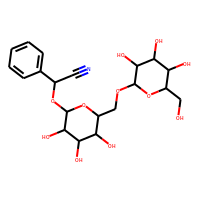

In [ ]:
#원본 데이터에 Molecule Object 추가하기
PandasTools.AddMoleculeColumnToFrame(data,'smiles','Molecule')
data[["smiles","Molecule"]].head(1)

64.0


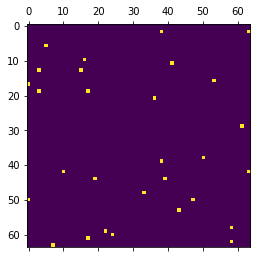

In [ ]:
from math import sqrt
print(sqrt(4096))
# https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
def mol2fp(mol):
    #원래 ECFP변환 hash크기는 2048이나 64x64의 크기로 보기위해 늘림
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar
fp =mol2fp(Chem.MolFromSmiles(data.loc[1,"smiles"]))
plt.matshow(fp.reshape((64,-1)) >0)

In [ ]:
#data의 "Molecule"열에 mol2fp를 한번에 적용하여 fingerprint 생성하고 이를 data의 "FPs"의 열로 추가함
data["FPs"] = data.Molecule.apply(mol2fp)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127
Compound ID,Amigdalin,Fenfuram,citral,Picene,Thiophene,benzothiazole,"2,2,4,6,6'-PCB",Estradiol,Dieldrin,Rotenone,2-pyrrolidone,2-Chloronapthalene,1-Pentene,Primidone,Tetradecane,2-Chloropropane,2-Methylbutanol,Benzonitrile,Diazinon,2-Undecanol,"2,2',3,4,6-PCB",Lenacil,Phorate,Phenacetin,Dinitramine,1-Heptanol,Theophylline,Butethal,"P,P'-DDE",Methyl octanoate,"1,4-Diethylbenzene",Terbufos,Phenmedipham,"1,1-Dichloroethylene",1-Methylfluorene,Valeraldehyde,Diphenylamine,Fenothiocarb,Piperophos,1-Iodoheptane,...,Chloroethane,Mefluidide,Piperine,cis-2-Pentene,thiofanox,Cyclooctyl-5-spirobarbituric acid,butacarb,Eriodictyol,Benzophenone,Eicosane,hydrazobenzene,2-Ethyl-1-butanol,4-hydroxypyridine,"cis 1,2-Dichloroethylene",Methylcyclopentane,4-Methyl-2-pentanol,RTI 11,"2,2-Dimethylpropanol",Triadimefon,Isocarboxazid,Propylene,Dichlorophen,Desmedipham,Anthraquinone,2-Octanol,Oxycarboxin,Butylbenzene,parabanic acid,Abate,Chlorthalidone,Isobutyl acetate,"2,2,3-Trimethylbutane","2,3,3',4,4'6-PCB",Phthalonitrile,m-Nitrotoluene,halothane,Oxamyl,Thiometon,2-Methylbutane,Stirofos
ESOL predicted log solubility in mols per litre,-0.974,-2.885,-2.579,-6.618,-2.232,-2.733,-6.545,-4.138,-4.533,-5.246,0.243,-4.063,-2.01,-1.897,-5.45,-1.585,-1.027,-2.03,-3.989,-3.096,-6.627,-3.355,-3.747,-2.342,-4.479,-1.751,-1.452,-1.974,-6.553,-2.608,-3.633,-4.367,-4.229,-1.939,-4.478,-1.103,-3.857,-3.297,-4.637,-3.904,...,-1.165,-3.165,-3.659,-2.076,-2.7,-2.284,-4.642,-3.152,-3.612,-7.576,-3.492,-1.381,-1.655,-1.561,-2.452,-1.308,-3.125,-1.011,-4.132,-2.251,-1.235,-4.924,-4.182,-3.34,-2.033,-2.169,-3.585,1.091,-6.678,-2.564,-1.463,-2.922,-7.746,-1.717,-2.64,-2.608,-0.908,-3.323,-2.245,-4.32
Minimum Degree,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Molecular Weight,457.432,201.225,152.237,278.354,84.143,135.191,326.437,272.388,380.913,394.423,85.106,162.619,70.135,218.256,198.394,78.542,88.15,103.124,304.352,172.312,326.437,234.299,260.386,179.219,322.243,116.204,180.167,212.249,318.03,158.241,134.222,288.44,300.314,96.944,180.25,86.134,169.227,253.367,353.49,226.101,...,64.515,310.297,285.343,70.135,218.322,224.26,263.381,288.255,182.222,282.556,184.242,102.177,95.101,96.944,84.162,102.177,254.289,88.15,293.754,231.255,42.081,269.127,300.314,208.216,130.231,267.306,134.222,114.06,466.479,338.772,116.16,100.205,395.327,128.134,137.138,197.381,219.266,246.359,72.151,365.964
Number of H-Bond Donors,7,1,0,0,0,0,0,2,0,0,1,0,0,2,0,0,1,0,0,1,0,1,0,1,1,1,1,2,0,0,0,0,2,0,0,0,1,0,0,0,...,0,2,0,0,1,2,1,4,0,0,2,1,1,0,0,1,1,1,0,2,0,2,2,0,1,1,0,2,0,3,0,0,0,0,0,0,1,0,0,0
Number of Rings,3,2,0,5,1,2,2,4,5,5,1,2,0,2,0,0,0,1,1,0,2,3,0,1,1,0,2,1,2,0,1,0,2,0,3,0,2,1,1,0,...,0,1,3,0,0,2,1,3,2,0,2,0,1,0,1,0,3,0,2,2,0,2,2,3,0,2,1,1,2,3,0,0,2,1,1,0,0,0,0,1
Number of Rotatable Bonds,7,2,4,0,0,0,1,0,0,3,0,0,2,2,11,0,2,0,7,8,1,1,8,3,5,5,0,4,2,6,2,7,3,0,0,3,2,6,9,5,...,0,3,3,1,3,0,1,1,2,17,3,3,0,0,0,2,0,0,4,4,0,2,4,0,5,2,3,0,10,2,2,0,1,0,1,0,1,7,1,5
Polar Surface Area,202.32,42.24,17.07,0,0,12.89,0,40.46,12.53,63.22,29.1,0,0,58.2,0,0,20.23,23.79,53.47,20.23,0,54.86,18.46,38.33,115.54,20.23,72.68,75.27,0,26.3,0,18.46,76.66,0,0,17.07,12.03,29.54,38.77,0,...,0,75.27,38.77,0,50.69,75.27,38.33,107.22,17.07,0,24.06,20.23,33.12,0,0,20.23,55.56,20.23,57.01,67.16,0,40.46,76.66,34.14,20.23,72.47,0,75.27,55.38,109.49,26.3,0,0,47.58,43.14,0,71,18.46,0,44.76
measured log solubility in mols per litre,-0.77,-3.3,-2.06,-7.87,-1.33,-1.5,-7.32,-5.03,-6.29,-4.42,1.07,-4.14,-2.68,-2.64,-7.96,-1.41,-0.47,-1,-3.64,-2.94,-7.43,-4.594,-4.11,-2.35,-5.47,-1.81,-1.39,-1.661,-6.9,-3.17,-3
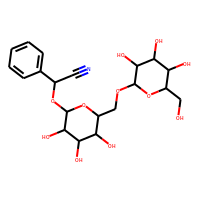
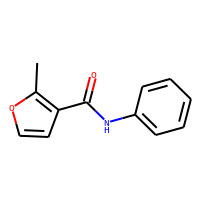
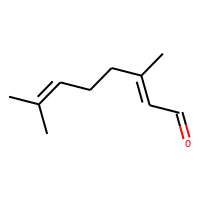
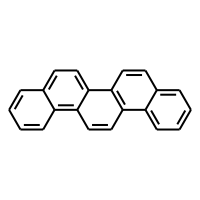
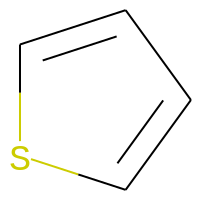
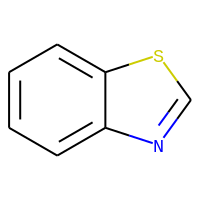
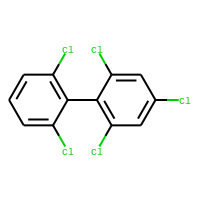
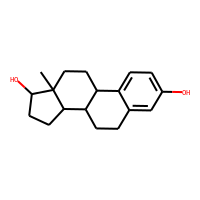
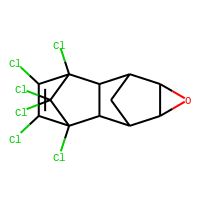
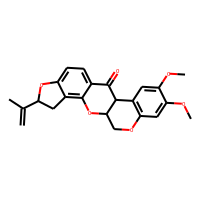
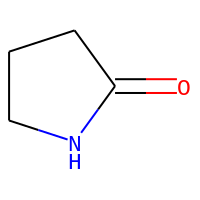
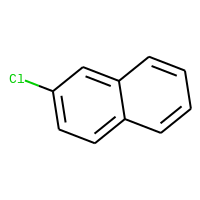
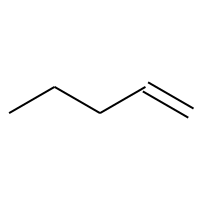
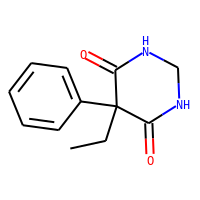
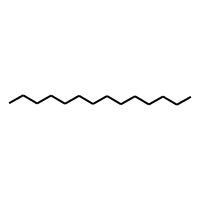
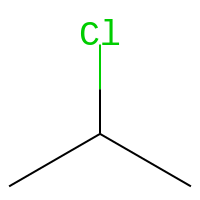
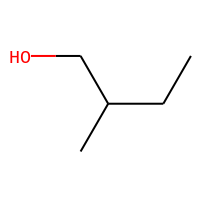
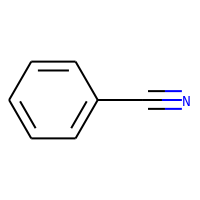
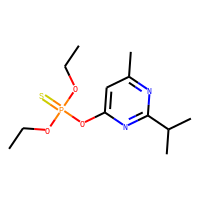
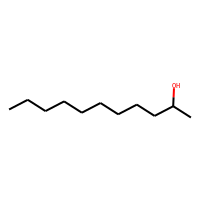
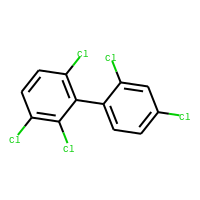
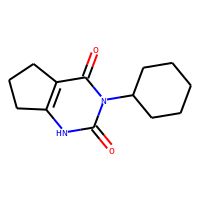
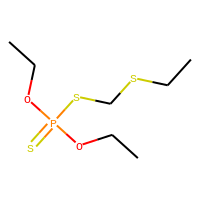
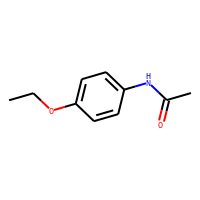
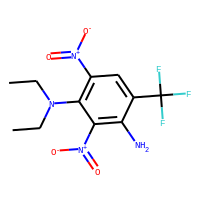
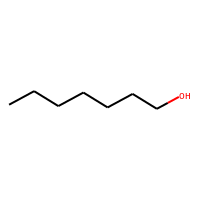
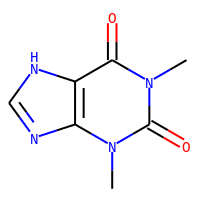
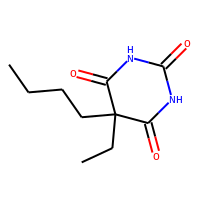
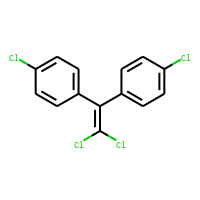
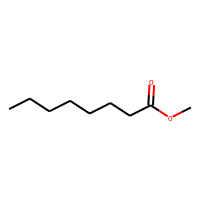
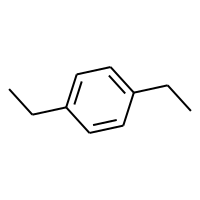
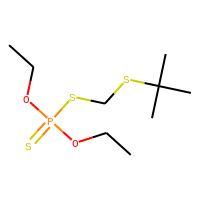
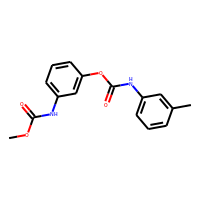
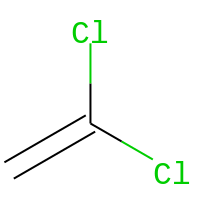
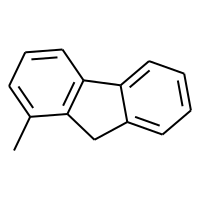
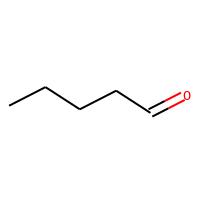
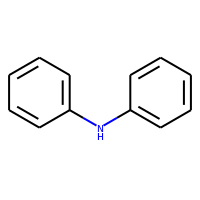
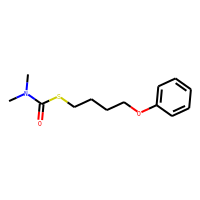
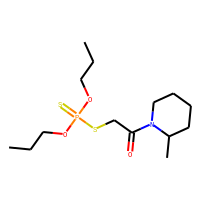
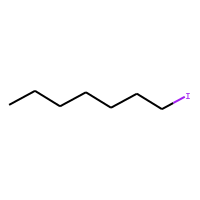
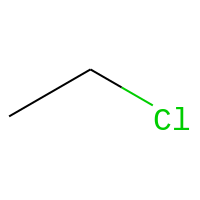
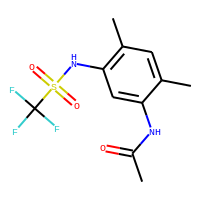
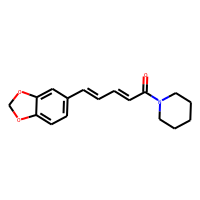
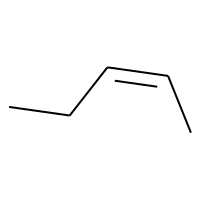
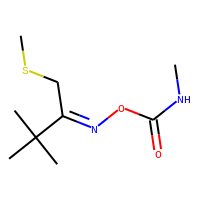
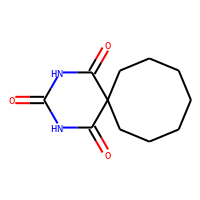
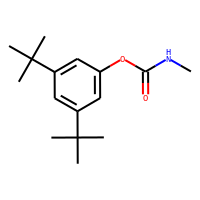
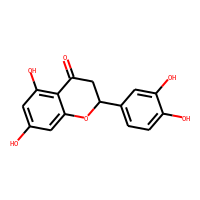
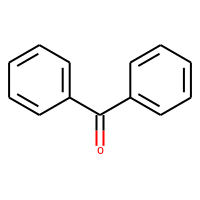
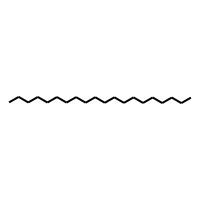
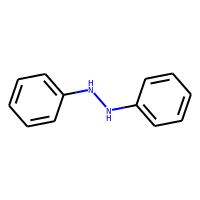
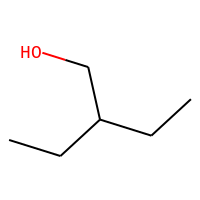
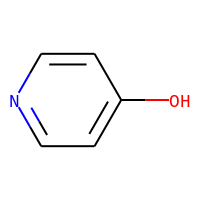
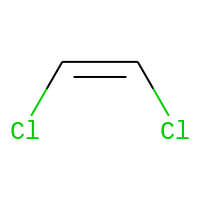
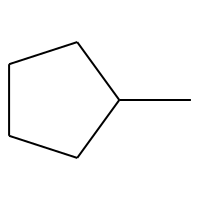
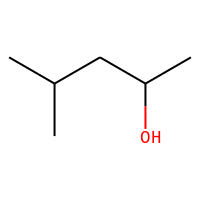
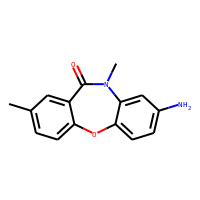
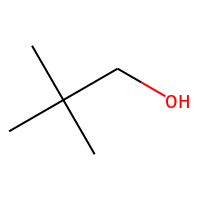
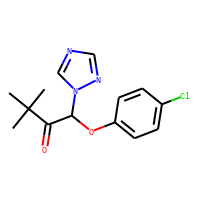
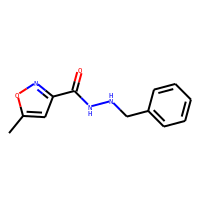
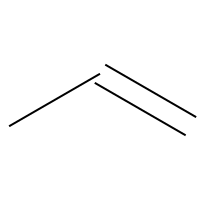
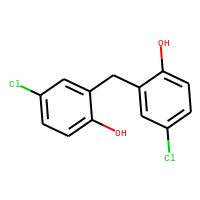
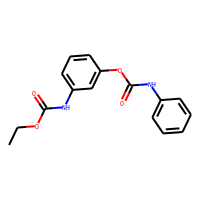
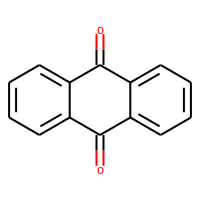
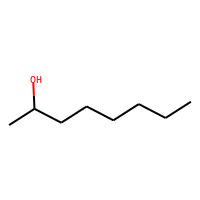
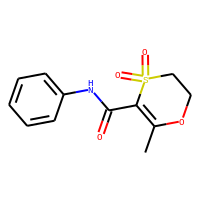
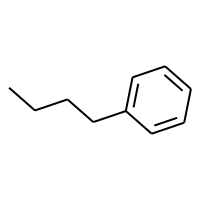
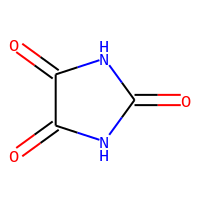
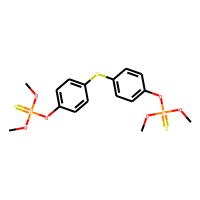
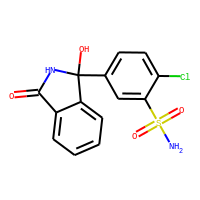
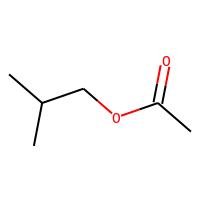
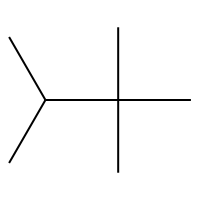
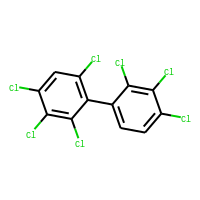
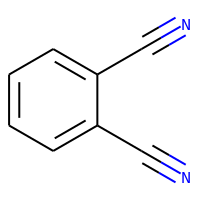
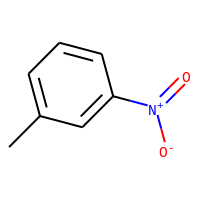
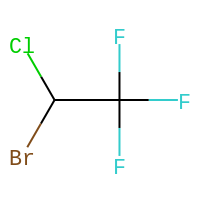
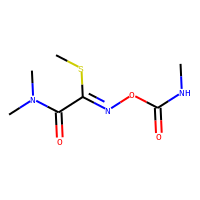
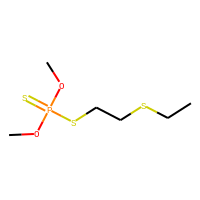
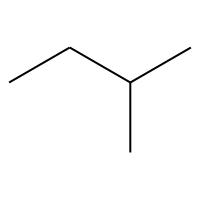
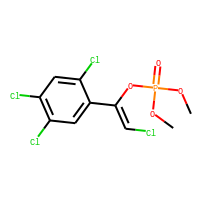

In [ ]:
data.T

## Data Transform

In [ ]:
#만들어진 데이터(FPs)를 X로 사용하고 "measured log solubility in mols per litre"를 y로 사용하기 위해 데이터 변환
#dataframe에 분할되어 저장되어있는 FPs의 값들은 하나의 np.ndarray에 합치는 함수 np.stack사용
X = np.stack(data.FPs.values)
print(X.shape)
print(X)
print(type(X))

(1128, 4096)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>


In [ ]:
print(type(data["measured log solubility in mols per litre"]))

<class 'pandas.core.series.Series'>


In [ ]:
#예측하려는 y를 numpy.ndarray로 변환
y = data["measured log solubility in mols per litre"].values.reshape((-1,1))
print(y)
print(type(y))

[[-0.77 ]
 [-3.3  ]
 [-2.06 ]
 ...
 [-3.091]
 [-3.18 ]
 [-4.522]]
<class 'numpy.ndarray'>


In [ ]:
#sklearn의 train_test_split함수를 사용하여 random하게 데이터를 나눔
#random_state=42로 고정 이 값을 변경할 경우 데이터의 구성이 바뀌니 기억해 둘것
#test_size=0.1로 1을 전체 데이터라고 가정했을때 전체 데이터의 10%를 테스트로 나머지 90% 훈련 데이터로 사용한다는 뜻
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
#splitd을 한번더 수행 이러한 이유는 valid 데이터를 수행하기 위함임 train 데이터의 10%를 valid 데이터로 생성
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.1, random_state=42)
#정규화 수행 [0,1]의 값으로 매핑시키며, x값은 0과1로 구성되어있는 데이터이고 y는 표준화로 변환
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

In [ ]:
#torch에 입출력으로 사용하기 위해서는 tensor변환을 수행해야함 tensor변환하는 코드
#일반적으로 float로 변환하여 사용함
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
X_validation = torch.tensor(X_validation).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()
y_validation = torch.tensor(y_validation).float()
X_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
#Train/Vaildation/Test데이터가 잘나뉘었고 우리가 변환한 FPs가 4096으로 주어졌는지확인
X_train.shape, X_validation.shape, X_test.shape

(torch.Size([913, 4096]), torch.Size([102, 4096]), torch.Size([113, 4096]))

In [ ]:
#예측하려는 y_train의 형태 출력
y_train.shape

torch.Size([913, 1])

In [ ]:
#TensorDataset을 사용하여 입력과 출력 쌍을 묶어줌
#이는 torch의 데이터로더함수를 사용하여 batch크기만큼 입력 출력쌍을 주기 위함
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, y_train)

In [ ]:
#DataLoader를 사용하여 전체 train, valid 데이터를 배치크기로 분할하면서 섞어주는 작업을 수행함 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=256,
                                          shuffle=True)

## DNN Model

In [ ]:
#나만의 딥러닝 모델 구축
#nn.XXX로 레이어를 추가할 수 있음
#예제의 모델은 (Linear, LayerNorm, ReLU, Dropout)이 한쌍으로 3번 반복되게 구성한 모델임
#단순 Linear 레이어를 쌓았지만 일반화를 위하여 LayerNorm, Dropout을 사용하였음

class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(MLPModel, self).__init__()
        # 3개의 fully connected Linear layer를 사용
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size) # Output layer      
        #ReLU 활성화 함수 추가
        self.activation = nn.ReLU()
        #Dropout 일반화 부분
        self.dropout = nn.Dropout(dropout_rate)
    #실제 학습시 레이어 사용 부분 
    def forward(self, x):
        out = self.linear1(x)
        out = self.activation(out)
        out = self.dropout(out)
        #1 block
        out = self.linear2(out)
        out = self.activation(out)
        out = self.dropout(out)
        #2 block
        out = self.linear3(out)
        out = self.activation(out)
        out = self.dropout(out)
        #3 block
        #Final output layer 1
        out = self.fc_out(out)
        return out

In [ ]:
X_train.size()

torch.Size([913, 4096])

In [ ]:
#하이퍼 파라미터 세팅
input_size = X_train.size()[-1]     #입력 데이터 크기 size
hidden_size = 1024   # The size of the hidden layer
dropout_rate = 0.8   # The dropout rate
output_size = 1        # This is just a single task, so this will be one
learning_rate = 0.001  # The learning rate for the optimizer

model = MLPModel(input_size, hidden_size, dropout_rate, output_size)
model

MLPModel(
  (linear1): Linear(in_features=4096, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc_out): Linear(in_features=1024, out_features=1, bias=True)
  (activation): ReLU()
  (dropout): Dropout(p=0.8, inplace=False)
)

In [ ]:
from IPython.display import Image
Image(url='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fk5Ch3%2FbtqDL4jjXl1%2F93WikBjXpxJ0e7kYy8c8SK%2Fimg.gif')

In [ ]:
#Loss function과 optimizer를 설정
#Loss function은 Mean Squared Error로
#Optimizer는 Adam으로
#pytorch Loss function: https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training

In [ ]:
#cpu 모드
from sklearn.metrics import r2_score
#실행시간 확인을 위한 timeit 라이브러리 import
import timeit
#시작 시간 획득 start_time에 저장
start_time = timeit.default_timer()
#학습을 수행하며 얻을 다양한 값들을 저장하기 위한 리스트 생성
list_epoch = []
list_train_loss = []
list_val_loss = []
list_r2 = []
#반복횟수 값 epochs 설정
epochs = 200
"""
200번을 반복하면서 e값을 늘려감 for x in range(int) 값을 주면 
0~ int값까지 1씩 증가시키며 주어진 int값-1까지 반복함 결국 int값만큼 반복함
이 반복문 안에서 데이터를 반복적으로 불러오며 학습을 수행함
"""

for e in range(epochs):
    running_loss = 0
    #반복문안에서 train_loader를 사용하여 batch_size만큼 데이터를 불러옴
    for X, y in train_loader:
        model.train() #학습 모드로 변경
        optimizer.zero_grad() # 그라디언트 값을 0으로 초기화
        #print(X.shape, y.shape)# 256
        output = model(X) #배치단위별로 model에 입력으로 줌(train_loader의 X)
        loss = criterion(output, y) #loss를 Lossfunction을 사용하여 구하는 부분(model이 출력해주는 output과 train_loader에서 불러온 실제 y값 사용)
        loss.backward() # backward를 통해서 그라디언트를 구해줌 optimizer가 감당할 파라미터들을 사용하여 미분을 수행함
        optimizer.step() # step을 통해서 그라디언트를 바탕으로 파라미터 업데이트
        running_loss += loss #이렇게 발생한 loss를 모두 더해줌 아래에서 train_loader의 길이로 나누어줘 평균 loss를 구함
    #위까지의 내용은 반복문 안에서 매번 실행되는 프로세스이고 아래의 경우 조건문에 따라 실행될 수 있도록 함
    else:
        if e%50 == 0: #e의 값이 계속증가하지만 %연산을 사용하여 e의 값이 50의 배수인경우 나머지가 0이므로 이때마다 아래의 값들을 계산
          #Validation 데이터의 X를 model의 입력으로 y값을 실제값으로 사용하여 MSE를 직접 구함  criterion을 사용하여도 무방
          validation_loss =torch.mean((y_validation-model(X_validation))**2) 
          #r2_score에는 ndarray만들어가야하는데 tensor에는 잡다한 값이 추가되어있어 .detach()함수를 사용하여 이를 없애줘야 계산이 가능
          list_r2.append(r2_score(y_validation.detach(), model(X_validation).detach()))
          list_epoch.append(e)
          list_train_loss.append(running_loss/len(train_loader))

          print("Epoch: %3i Training loss: %0.2F Validation loss: %0.2F"%(e,(running_loss/len(train_loader)), validation_loss))
          list_val_loss.append(validation_loss)
#다시 현재 시간을 얻어 실행후 시간을 얻고 시작시간과의 차이를 비교하여 실행시간을 구함
terminate_time = timeit.default_timer()
print("%f초 걸렸습니다."% (terminate_time-start_time))

Epoch:   0 Training loss: 0.94 Validation loss: 0.90
Epoch:  50 Training loss: 0.10 Validation loss: 0.29
Epoch: 100 Training loss: 0.08 Validation loss: 0.23
Epoch: 150 Training loss: 0.08 Validation loss: 0.23
156.322495초 걸렸습니다.


## DNN 모델의 성능평가

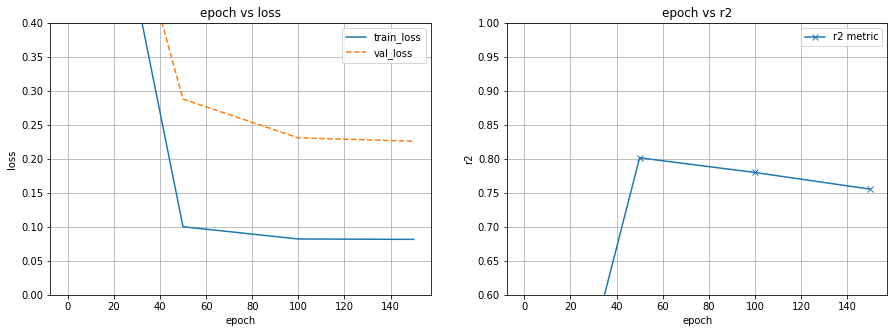

In [ ]:
#보여줄 그래프 전체의 크기 지정
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
#subplot의 인자는 (행, 열, 몇번째그래프인지)
#현재의 경우 1*2=2개의 그래프를 그림
ax1 = fig.add_subplot(1, 2, 1)
#처음 그래프에는 epoch당 loss를 그려줌 train_loss와 val_loss를 그림
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')#특히 val_loss는 --로 도트형태로 표시
# 그래프의 X,y라벨 값 설정
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
#set_ylim으로 y축의 값을 설정 가능
ax1.set_ylim(0, 0.4)
ax1.grid()#격자 출력

ax1.legend()#범주 출력
ax1.set_title('epoch vs loss')#그래프 제목 출력

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_epoch, list_r2, marker='x', label='r2 metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('r2')
ax2.set_ylim(0.6, 1.0)
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs r2')

plt.show()

epoch당 loss 그래프와 epoch당 r2 그래프를 살펴보고 성능평가 및 에포크 수 결정 

In [ ]:
#evaluation mode로 전환
model.eval()
#학습한 모델에 각 데이터의 입력을 주어 예측값들을 생성
y_pred_train = model(X_train)
y_pred_validation = model(X_validation)
y_pred_test = model(X_test)

In [ ]:
#test 데이터셋의 RMSE와 R2점수 구하기 
print("RMSE: {0:.3f}".format(torch.sqrt(torch.mean(( y_test - y_pred_test )**2)).detach()))
print("r2_score: {0:.3f}".format(r2_score(y_test.detach() , y_pred_test.detach())))

RMSE: 0.584
r2_score: 0.723


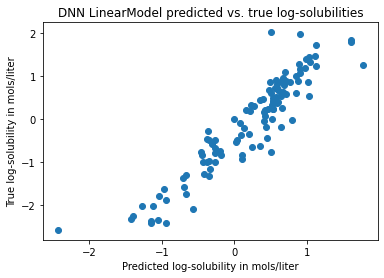

In [ ]:
plt.scatter(y_pred_test.detach(), y_test.detach())
plt.xlabel('Predicted log-solubility in mols/liter')
plt.ylabel('True log-solubility in mols/liter')
plt.title(r'DNN LinearModel predicted vs. true log-solubilities')
plt.show()

CPU를 사용하는 예제와 GPU를 사용하는 예제간 충돌이 발생하여 illegal CUDA 에러가 발생한다면 아래의 셀부터 실행하면됩니다.

# Pytorch GPU사용하기

## load to data

In [ ]:
!wget https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv

--2020-09-29 00:44:18--  https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96699 (94K) [text/plain]
Saving to: ‘delaney-processed.csv.4’

delaney-processed.c 100%[===================>]  94.43K  --.-KB/s    in 0.02s   

2020-09-29 00:44:18 (5.93 MB/s) - ‘delaney-processed.csv.4’ saved [96699/96699]



In [ ]:
#파이썬에서 데이터를 다루기 위한 라이브러리들
import numpy as np
import pandas as pd
#파이썬에서 시각화를 수행해주는 라이브러리
import matplotlib.pyplot as plt
#AI framework torch와 torch의 하위 라이브러리 호출
import torch
import torch.nn as nn
#표준화를 수행하기 위한 라이브러리
from sklearn.preprocessing import StandardScaler
#데이터 분할을 하기 위한 라이브러리
from sklearn.model_selection import train_test_split

data = pd.read_csv("delaney-processed.csv")

## Data Transform

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from math import sqrt
PandasTools.AddMoleculeColumnToFrame(data,'smiles','Molecule')
def mol2fp(mol):
    #원래 ECFP변환 hash크기는 2048이나 64x64의 크기로 보기위해 늘림
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar
fp =mol2fp(Chem.MolFromSmiles(data.loc[1,"smiles"]))
data["FPs"] = data.Molecule.apply(mol2fp)

In [ ]:
#만들어진 데이터(FPs)를 X로 사용하고 "measured log solubility in mols per litre"를 y로 사용하기 위해 데이터 변환
#dataframe에 분할되어 저장되어있는 FPs의 값들은 하나의 np.ndarray에 합치는 함수 np.stack사용
X = np.stack(data.FPs.values)
y = data["measured log solubility in mols per litre"].values.reshape((-1,1))

In [ ]:
#sklearn의 train_test_splie함수를 사용하여 random하게 데이터를 나눔
#random_state=42로 고정 이 값을 변경할 경우 데이터의 구성이 바뀌니 기억해 둘것
#test_size=0.1로 1을 전체 데이터라고 가정했을때 전체 데이터의 10%를 테스트로 나머지 90% 훈련 데이터로 사용한다는 뜻
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
#splitd을 한번더 수행 이러한 이유는 valid 데이터를 수행하기 위함임 train 데이터의 10%를 valid 데이터로 생성
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.1, random_state=42)
#정규화 수행 [0,1]의 값으로 
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

In [ ]:
# gpu에서 학습 시키기위해서 torch.device획득
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
#tensor로 변환하는 부분에 device 값 추가
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
X_validation = torch.tensor(X_validation, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()
y_validation = torch.tensor(y_validation, device=device).float()
X_train

cuda:0


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

## GPU DNN Model

In [ ]:
#나만의 딥러닝 모델 구축
#nn.XXX로 레이어를 추가할 수 있음
#예제의 모델은 (Linear, ReLU, Dropout)이 한쌍으로 3번 반복되게 구성한 모델임
#단순 Linear 레이어를 쌓았지만 일반화를 위하여 LayerNorm, Dropout을 사용하였음
class cudaMLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(cudaMLPModel, self).__init__()
        # 3개의 fully connected Linear layer를 사용
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.linear2 = nn.Linear(hidden_size, hidden_size)
        self.linear3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size) # Output layer      
        #ReLU 활성화 함수 추가
        self.activation = nn.ReLU()
        #Dropout 일반화 부분
        self.dropout = nn.Dropout(dropout_rate)
    #실제 학습시 레이어 사용 부분 
    def forward(self, x):
        out = self.linear1(x)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.linear2(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.linear3(out)
        out = self.activation(out)
        out = self.dropout(out)
        #Final output layer
        out = self.fc_out(out)
        return out

In [ ]:
#하이퍼 파라미터 세팅
input_size = X_train.size()[-1]     # fp의 길이를 획득
hidden_size = 1024   # 은닉 계층의 크기
dropout_rate = 0.8   # 드롭아웃 비율
output_size = 1        # 학습의 마지막에 출력할 값의 갯수 
learning_rate = 0.0001  # optimizer에 대한 learning rate

cudamodel = cudaMLPModel(input_size, hidden_size, dropout_rate, output_size)

In [ ]:
#학습 모델이 GPU를 사용한다는 표시
cudamodel.cuda()

cudaMLPModel(
  (linear1): Linear(in_features=4096, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc_out): Linear(in_features=1024, out_features=1, bias=True)
  (activation): ReLU()
  (dropout): Dropout(p=0.8, inplace=False)
)

In [ ]:
#TensorDataset을 사용하여 입력과 출력 쌍을 묶어줌
#이는 torch의 데이터로더함수를 사용하여 batch크기만큼 입력 출력x쌍을 주기 위함
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, y_train)

In [ ]:
#DataLoader를 사용하여 전체 train, valid 데이터를 배치크기로 분할하면서 섞어주는 작업을 수행함 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=256,
                                          shuffle=True)

In [ ]:
#Loss function과 optimizer를 설정
criterion2 = nn.MSELoss()
#weight_decay=0
optimizer2 = torch.optim.Adam(cudamodel.parameters(), lr=learning_rate)

## Training

In [ ]:
#gpu모드
from sklearn.metrics import r2_score
#실행시간 확인을 위한 timeit 라이브러리 import
import timeit
#시작 시간 획득 start_time에 저장
start_time = timeit.default_timer()

#학습을 수행하며 얻을 다양한 값들을 저장하기 위한 리스트 생성
list_epoch = []
list_train_loss = []
list_val_loss = []
list_r2 = []
#반복횟수 값 epochs 설정
epochs = 200
"""
200번을 반복하면서 e값을 늘려감 for x in range(int) 값을 주면 
0~ int값까지 1씩 증가시키며 주어진 int값-1까지 반복함 결국 int값만큼 반복함
이 반복문 안에서 데이터를 반복적으로 불러오며 학습을 수행함
"""

for e in range(epochs):
    running_loss = 0
    #반복문안에서 train_loader를 사용하여 batch_size만큼 데이터를 불러옴
    for X, y in train_loader:
        cudamodel.train()#학습 모드로 변경
        optimizer2.zero_grad() # 그라디언트 값을 0으로 초기화
         
        output = cudamodel(X) #배치단위별로 model에 입력으로 줌(train_loader의 X)
        loss = criterion2(output, y) #loss를 Lossfunction을 사용하여 구하는 부분(model이 출력해주는 output과 train_loader에서 불러온 실제 y값 사용)
        loss.backward() # backward를 통해서 그라디언트를 구해줌 optimizer가 감당할 파라미터들을 사용하여 미분을 수행함
        optimizer2.step() # step을 통해서 그라디언트를 바탕으로 파라미터 업데이트
        running_loss += loss.item() #이렇게 발생한 loss를 모두 더해줌 아래에서 train_loader의 길이로 나누어줘 평균 loss를 구함 gpu의 경우 item()을 사용해야함
    #위까지의 내용은 반복문 안에서 매번 실행되는 프로세스이고 아래의 경우 조건문에 따라 실행될 수 있도록 함
    else:
        if e%50 == 0: #e의 값이 계속증가하지만 %연산을 사용하여 e의 값이 50의 배수인경우 나머지가 0이므로 이때마다 아래의 값들을 계산
            #Validation 데이터의 X를 model의 입력으로 y값을 실제값으로 사용하여 MSE를 직접 구함  criterion을 사용하여도 무방
            validation_loss = torch.mean(( y_validation - cudamodel(X_validation) )**2).item()
            #r2_score에는 ndarray만들어가야하는데 tensor에는 잡다한 값이 추가되어있어 .detach().cpu()를 사용하여야 계산가능
            list_r2.append(r2_score(y_validation.detach().cpu(), cudamodel(X_validation).detach().cpu()))
            list_epoch.append(e)
            list_train_loss.append(running_loss/len(train_loader))

            print("Epoch: %3i Training loss: %0.2F Validation loss: %0.2F"%(e,(running_loss/len(train_loader)), validation_loss))
            list_val_loss.append(validation_loss)
            
#다시 현재 시간을 얻어 실행후 시간을 얻고 시작시간과의 차이를 비교하여 실행시간을 구함
terminate_time = timeit.default_timer()
print("%f초 걸렸습니다."% (terminate_time-start_time))

Epoch:   0 Training loss: 0.99 Validation loss: 1.08
Epoch:  50 Training loss: 0.18 Validation loss: 0.29
Epoch: 100 Training loss: 0.09 Validation loss: 0.21
Epoch: 150 Training loss: 0.06 Validation loss: 0.19
4.258349초 걸렸습니다.


## GPU DNN 모델의 성능평가

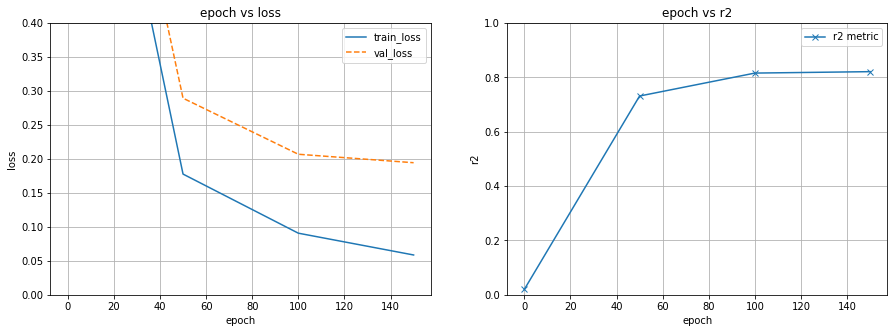

In [ ]:
# 보여줄 그래프 전체의 크기 지정
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
# subplot의 인자는 (행, 열, 몇번째그래프인지)
# 현재의 경우 1*2=2개의 그래프를 그림
ax1 = fig.add_subplot(1, 2, 1)
# 처음 그래프에는 epoch당 loss를 그려줌 train_loss와 val_loss를 그림
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')# 특히 val_loss는 --로 도트형태로 표시
# 그래프의 X,y라벨 값 설정
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 0.4) # set_ylim으로 y축의 값을 설정 가능
ax1.grid() # 격자 출력
ax1.legend()# 범주 출력
ax1.set_title('epoch vs loss')# 그래프 제목 출력

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_epoch, list_r2, marker='x', label='r2 metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('r2')
ax2.set_ylim(0, 1.0)
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs r2')

plt.show()

In [ ]:
#evaluation mode로 전환
cudamodel.eval()
y_pred_train = cudamodel(X_train)
y_pred_validation = cudamodel(X_validation)
y_pred_test = cudamodel(X_test)

In [ ]:
#test 데이터셋의 MSE와 R2점수 구하기 
#test 데이터셋의 RMSE와 R2점수 구하기 
print("RMSE: {0:.3f}".format(torch.sqrt(torch.mean(( y_test - y_pred_test )**2)).item()))
print("r2_score: {0:.3f}".format(r2_score(y_test.detach().cpu().clone() , y_pred_test.detach().cpu().clone())))

RMSE: 0.416
r2_score: 0.859


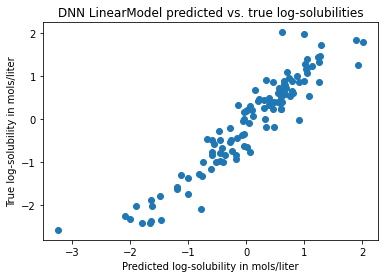

In [ ]:
plt.scatter(y_pred_test.detach().cpu().clone(), y_test.detach().cpu().clone())
plt.xlabel('Predicted log-solubility in mols/liter')
plt.ylabel('True log-solubility in mols/liter')
plt.title(r'DNN LinearModel predicted vs. true log-solubilities')
plt.show()

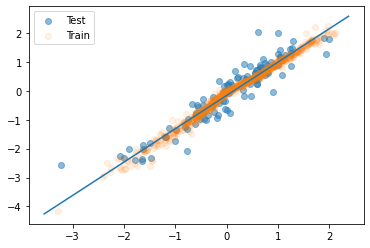

In [ ]:
from numpy.polynomial.polynomial import polyfit
#얻어온 텐서를 flatten()함수로 일자로 폄
def flatten(tensor):
    return tensor.cpu().detach().numpy().flatten()
# 이 값들을 사용하여 산점도를 그림    
plt.scatter(flatten(y_pred_test), flatten(y_test), alpha=0.5, label="Test")
plt.scatter(flatten(y_pred_train), flatten(y_train), alpha=0.1, label="Train")
# Fit with polyfit
axes = plt.gca()
m, b = np.polyfit(flatten(y_pred_train), flatten(y_train), 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')

plt.legend()
plt.show()

In [ ]:
#정확한 값 예측을 위해 다음과 같이 inverse_transform을 사용
def predict_smiles(smiles):
    #모델에 찾고자하는 smiles를 입력으로 주면 Smiles를 fingerprint로 변형
    fp =mol2fp(Chem.MolFromSmiles(smiles)).reshape(1,-1)
    #fp를 torch.tensor입력으로 변환gpu사용하는 경우
    fp_tensor = torch.tensor(fp, device=device).float()
    #모델에 변형한 입력을 줌
    prediction = cudamodel(fp_tensor)
    #return prediction.cpu().detach().numpy()
    #모델 학습 시 입력 및 출력 데이터를 transform하였기에 inverse_transform을 사용하여 원본 값의 범위로 재조정하여 예측값 출력
    logP = scaler.inverse_transform(prediction.cpu().detach().numpy())
    return logP[0][0]
predict_smiles('Cc1ccc2c(N3CCNCC3)cc(F)cc2n1')

-3.4563477

# 하이퍼 파라미터 Grid Search

## load to data

In [ ]:
data = pd.read_csv("delaney-processed.csv")

## Data Transform

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from math import sqrt
PandasTools.AddMoleculeColumnToFrame(data,'smiles','Molecule')
def mol2fp(mol):
    #원래 ECFP변환 hash크기는 2048이나 64x64의 크기로 보기위해 늘림
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar
fp =mol2fp(Chem.MolFromSmiles(data.loc[1,"smiles"]))
data["FPs"] = data.Molecule.apply(mol2fp)

In [ ]:
#만들어진 데이터(FPs)를 X로 사용하고 "measured log solubility in mols per litre"를 y로 사용하기 위해 데이터 변환
#dataframe에 분할되어 저장되어있는 FPs의 값들은 하나의 np.ndarray에 합치는 함수 np.stack사용
X = np.stack(data.FPs.values)
y = data["measured log solubility in mols per litre"].values.reshape((-1,1))

In [ ]:
#sklearn의 train_test_splie함수를 사용하여 random하게 데이터를 나눔
#random_state=42로 고정 이 값을 변경할 경우 데이터의 구성이 바뀌니 기억해 둘것
#test_size=0.1로 1을 전체 데이터라고 가정했을때 전체 데이터의 10%를 테스트로 나머지 90% 훈련 데이터로 사용한다는 뜻
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
#splitd을 한번더 수행 이러한 이유는 valid 데이터를 수행하기 위함임 train 데이터의 10%를 valid 데이터로 생성
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.1, random_state=42)
#정규화 수행 [0,1]의 값으로 y값에 대해서만 정규화 수행
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

In [ ]:
# gpu에서 학습
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
#tensor로 변환하는 부분에 device 값 추가
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
X_validation = torch.tensor(X_validation, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()
y_validation = torch.tensor(y_validation, device=device).float()
X_train

cuda:0


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
    #TensorDataset을 사용하여 입력과 출력 쌍을 묶어줌
    #이는 torch의 데이터로더함수를 사용하여 batch크기만큼 입력 출력쌍을 주기 위함
    from torch.utils.data import TensorDataset
    train_dataset = TensorDataset(X_train, y_train)

    #DataLoader를 사용하여 전체 train, valid 데이터를 배치크기로 분할하면서 섞어주는 작업을 수행함 
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=256,
                                              shuffle=True)

## Training & Tuning Hyper-parameter

In [ ]:
from sklearn.metrics import r2_score
from itertools import product
#하이퍼 파라미터 세팅
input_size = X_train.size()[-1]     #fingerprint size를 얻어오는 코드
hidden_size = 1024   #히든 레이어 크기
output_size = 1        # 1개의 숫자를 예측하기 때문에 output의 크기를 1로 설정
#간단한 하이퍼파라미터를 찾기위한 사전(dictionary) 구성
parameters = dict(
    learning_rates = [0.001,0.0001]
    ,dropout_rates= [0.8,0.5]
    ,epochs=[200,300]
    ,hidden_size=[512,1024]
)
#parameters라는 사전에 저장되어있는 값을 모두 출력
param_values = [v for v in parameters.values()]
print(param_values)
prev_score = 0.0
best_param=[]
# 이 값들에서 해당 하는 값들을 반복문으로 얻어내어 가능한 조합에 따라 학습 수행
for lr, dropout_rate, epochs, hidden_size in product(*param_values):
    #여기 아래부터는 이전에 사용했던 코드와 동일 대신에 학습률=lr, droput_rate, epochs, hidden_size는 변경하면서 학습
    grid_model = MLPModel(input_size, hidden_size, dropout_rate, output_size)
    grid_model.cuda()

    criterion3 = nn.MSELoss()
    optimizer3 = torch.optim.Adam(grid_model.parameters(), lr=lr)
    #반복횟수 값 epochs 설정
    epochs = epochs
    """
    주어진 epochs만큼 반복하면서 e값을 늘려감 for x in range(int) 값을 주면 
    0~ int값까지 1씩 증가시키며 주어진 int값-1까지 반복함 결국 int값만큼 반복함
    이 반복문 안에서 데이터를 반복적으로 불러오며 학습을 수행함
    """
    #e==300일때의 값을 출력하기 위해 epochs값에 +1을 하여 e가 300일때까지 수행되도록함
    for e in range(epochs+1):
        running_loss = 0
        #반복문안에서 train_loader를 사용하여 batch_size만큼 데이터를 불러옴
        for X, y in train_loader:
            # Training pass
            grid_model.train() #학습 모드로 변경
            optimizer3.zero_grad() # 그라디언트 값을 0으로 초기화
            output = grid_model(X) #배치단위별로 model에 입력으로 줌(train_loader의 X)
            loss = criterion3(output, y) #loss를 Lossfunction을 사용하여 구하는 부분(model이 출력해주는 output과 train_loader에서 불러온 실제 y값 사용)
            loss.backward() # backward를 통해서 그라디언트를 구해줌 optimizer가 감당할 파라미터들을 사용하여 미분을 수행함
            optimizer3.step() # step을 통해서 그라디언트를 바탕으로 파라미터 업데이트
            running_loss += loss.item() # 이렇게 발생한 loss를 모두 더해줌 아래에서 train_loader의 길이로 나누어줘 평균 loss를 구함 gpu의 경우 item()을 사용해야함
        #위까지의 내용은 반복문 안에서 매번 실행되는 프로세스이고 아래의 경우 조건문에 따라 실행될 수 있도록 함
        else:
            if e%100 == 0: #e의 값이 계속증가하지만 %연산을 사용하여 e의 값이 100의 배수인경우 나머지가 0이므로 이때마다 아래의 값들을 계산
                #Validation 데이터의 X를 model의 입력으로 y값을 실제값으로 사용하여 MSE를 직접 구함  criterion을 사용하여도 무방
                validation_loss = torch.mean(( y_validation - grid_model(X_validation) )**2).item()
                print("Epoch: %3i Training loss: %0.2F Validation loss: %0.2F"%(e,(running_loss/len(train_loader)), validation_loss))
                #list_val_loss.append(validation_loss)
            if e == epochs:
              #r2_score에는 ndarray만들어가야하는데 tensor에는 잡다한 값이 추가되어있어 .detach().cpu()를 사용하여야 계산가능
              score = r2_score(y_validation.detach().cpu(), grid_model(X_validation).detach().cpu())
              print("lr:", lr, "dropout_rate:", dropout_rate, "epochs:",epochs, "hidden_size: ", hidden_size,"validation_loss:",validation_loss, "r2_score:", score)
              #높은 성능(r2)을 가지는 하이퍼파라미터 조합을 얻기 위한 최댓값 비교 함수 
              if prev_score < score:
                prev_score=score
                #best_param의 값에 해당 값들을
                best_param={'lr':lr, 'dropout_rate':dropout_rate, 'epochs':epochs, 'hidden_size':hidden_size,'r2_score':score}

[[0.001, 0.0001], [0.8, 0.5], [200, 300], [512, 1024]]
Epoch:   0 Training loss: 0.99 Validation loss: 1.03
Epoch: 100 Training loss: 0.09 Validation loss: 0.29
Epoch: 200 Training loss: 0.09 Validation loss: 0.25
lr: 0.001 dropout_rate: 0.8 epochs: 200 hidden_size:  512 validation_loss: 0.2525760233402252 r2_score: 0.7382637723506331
Epoch:   0 Training loss: 0.96 Validation loss: 0.94
Epoch: 100 Training loss: 0.10 Validation loss: 0.26
Epoch: 200 Training loss: 0.09 Validation loss: 0.24
lr: 0.001 dropout_rate: 0.8 epochs: 200 hidden_size:  1024 validation_loss: 0.23654471337795258 r2_score: 0.7750676626440283
Epoch:   0 Training loss: 0.99 Validation loss: 1.00
Epoch: 100 Training loss: 0.10 Validation loss: 0.27
Epoch: 200 Training loss: 0.09 Validation loss: 0.24
Epoch: 300 Training loss: 0.09 Validation loss: 0.21
lr: 0.001 dropout_rate: 0.8 epochs: 300 hidden_size:  512 validation_loss: 0.21416376531124115 r2_score: 0.7505335782871052
Epoch:   0 Training loss: 0.98 Validation l

In [ ]:
print(best_param)

{'lr': 0.0001, 'dropout_rate': 0.5, 'epochs': 200, 'hidden_size': 1024, 'r2_score': 0.8438792137374628}


# Convolutional Neural Network

## load to data

In [ ]:
data = pd.read_csv("delaney-processed.csv")


## Data Tansform

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from math import sqrt
PandasTools.AddMoleculeColumnToFrame(data,'smiles','Molecule')
def mol2fp(mol):
    #원래 ECFP변환 hash크기는 2048이나 64x64의 크기로 보기위해 늘림
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar
fp =mol2fp(Chem.MolFromSmiles(data.loc[1,"smiles"]))
data["FPs"] = data.Molecule.apply(mol2fp)

In [ ]:
#dataframe에 분할되어 저장되어있는 FPs의 값들은 하나의 np.ndarray에 합치는 함수 np.stack사용
#합친 결과를 (1128,1, 64,64)로 모양 수정 CNN입력인 4차원으로 주기 위함
X = np.stack(data.FPs.values)
X = X.reshape(len(X),1,64,-1)
print(X.shape)
print(X)

(1128, 1, 64, 64)
[[[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 [[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 1]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 [[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 ...


 [[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 [[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 [[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]]


In [ ]:
y = data["measured log solubility in mols per litre"].values.reshape((-1,1))
print(y)
print(type(y))

[[-0.77 ]
 [-3.3  ]
 [-2.06 ]
 ...
 [-3.091]
 [-3.18 ]
 [-4.522]]
<class 'numpy.ndarray'>


In [ ]:
#sklearn의 train_test_split함수를 사용하여 random하게 데이터를 나눔
#random_state=42로 고정 이 값을 변경할 경우 데이터의 구성이 바뀌니 기억해 둘것
#test_size=0.1로 1을 전체 데이터라고 가정했을때 전체 데이터의 10%를 테스트로 나머지 90% 훈련 데이터로 사용한다는 뜻
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
#splitd을 한번더 수행 이러한 이유는 valid 데이터를 수행하기 위함임 train 데이터의 10%를 valid 데이터로 생성
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.1, random_state=42)
#정규화 수행 [0,1]의 값으로 
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

In [ ]:
print(X_train.shape, X_validation.shape, X_test.shape)

(913, 1, 64, 64) (102, 1, 64, 64) (113, 1, 64, 64)


In [ ]:
#랜덤 시드 고정
torch.manual_seed(42)
# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(42)
# gpu에서 학습
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
X_validation = torch.tensor(X_validation, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()
y_validation = torch.tensor(y_validation, device=device).float()
X_train

cuda:0


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [1., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 1.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [ ]:
#TensorDataset을 사용하여 입력과 출력 쌍을 묶어줌
#이는 torch의 데이터로더함수를 사용하여 batch크기만큼 입력 출력쌍을 주기 위함
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, y_train)

In [ ]:
#DataLoader를 사용하여 전체 train, valid 데이터를 배치크기로 분할하면서 섞어주는 작업을 수행함 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=256,
                                          shuffle=True)

In [ ]:
#나만의 딥러닝 모델 구축
#nn.XXX로 레이어를 추가할 수 있음
#예제의 모델은 CNN모델을 사용하기 위해 Conv2d relue, max_pool2d가 하나의 컬렉션으로 구성되어 2번을 반복하고 마지막 fc레이어를 구성한 값이 됨
#단순 Linear 레이어를 쌓았지만 일반화를 위하여 LayerNorm, Dropout을 사용하였음
class CNNModel(nn.Module):
    def __init__(self,):
        super(CNNModel, self).__init__()
        #cnn layer
        # 64* 64 = 3filter padding 1 stride =1 (64-3+2*1+1)/1= 64
        self.conv1 = nn.Conv2d(1,2,kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(2,4,kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(4,8,kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(8,16,kernel_size=3, padding=1)
        #activation function
        self.relu = nn.ReLU()
        #pooling layer
        self.maxpool = nn.MaxPool2d(2)
        #dropout layer
        self.dropout1 = nn.Dropout2d(0.2)
        #fully connect layer
        self.fc1 = nn.Linear(16 * 16 * 16, 1024) 
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 1)
     
    def forward(self, x):# Forward pass: stacking each layer together
        #input Shape (batch_size,1,64,64)
        x = self.conv1(x)
        #convol(batch_size,2,64,64)
        x = self.relu(x)
        x = self.conv2(x)
        #convol(batch_size,4,64,64)
        x = self.relu(x)
        x = self.maxpool(x)
        #pooling (batch_size,4,32,32)
        x = self.dropout1(x)
        x = self.conv3(x)
        #convol(batch_size,8,32,32)
        x = self.relu(x)
        x = self.conv4(x)
        #convol(batch_size,16,32,32)
        x = self.relu(x)
        x = self.maxpool(x)
        #pooling (batch_size,16,16,16) 
        x = self.dropout1(x)  
        x = x.view(x.size(0),-1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [ ]:
#하이퍼 파라미터 세팅
learning_rate = 0.0001  # The learning rate for the optimizer

cnnmodel = CNNModel()
print(cnnmodel)

CNNModel(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.2, inplace=False)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)


In [ ]:
cnnmodel.cuda()

CNNModel(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.2, inplace=False)
  (fc1): Linear(in_features=4096, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(cnnmodel.parameters(), lr=learning_rate)

## Training

In [ ]:
from sklearn.metrics import r2_score
#학습을 수행하며 얻을 다양한 값들을 저장하기 위한 리스트 생성
list_epoch = []
list_train_loss = []
list_val_loss = []
list_train_r2 = []
list_val_r2 = []
#반복횟수 값 epochs 설정
epochs = 200
for e in range(epochs+1):
    #반복문안에서 train_loader를 사용하여 batch_size만큼 데이터를 불러옴
    running_loss = 0
    for X, y in train_loader:
        cnnmodel.train()# 학습 모드로 변경
        optimizer.zero_grad() # 그라디언트 값을 0으로 초기화
         
        output = cnnmodel(X) # 배치단위별로 model에 입력으로 줌(train_loader의 X)
        loss = criterion(output, y) # loss를 Lossfunction을 사용하여 구하는 부분(model이 출력해주는 output과 train_loader에서 불러온 실제 y값 사용)
        loss.backward() # backward를 통해서 그라디언트를 구해줌 optimizer가 감당할 파라미터들을 사용하여 미분을 수행함
        optimizer.step() # step을 통해서 그라디언트를 바탕으로 파라미터 업데이트
        running_loss += loss.item()# 이렇게 발생한 loss를 모두 더해줌 아래에서 train_loader의 길이로 나누어줘 평균 loss를 구함 gpu의 경우 item()을 사용해야함
    # 위까지의 내용은 반복문 안에서 매번 실행되는 프로세스이고 아래의 경우 조건문에 따라 실행될 수 있도록 함
    else:
        if e%50 == 0: #e의 값이 계속증가하지만 %연산을 사용하여 e의 값이 50의 배수인경우 나머지가 0이므로 이때마다 아래의 값들을 계산
            #Validation 데이터의 X를 model의 입력으로 y값을 실제값으로 사용하여 MSE를 직접 구함  criterion을 사용하여도 무방
            validation_loss = torch.mean(( y_validation - cnnmodel(X_validation) )**2).item()
            #r2_score에는 ndarray만들어가야하는데 tensor에는 잡다한 값이 추가되어있어 .detach().cpu()를 사용하여야 계산가능
            list_train_r2.append(r2_score(y_train.detach().cpu(), cnnmodel(X_train).detach().cpu()))
            list_val_r2.append(r2_score(y_validation.detach().cpu(), cnnmodel(X_validation).detach().cpu()))
            list_epoch.append(e)
            list_train_loss.append(running_loss/len(train_loader))

            print("Epoch: %3i Training loss: %0.2F Validation loss: %0.2F"%(e,(running_loss/len(train_loader)), validation_loss))
            list_val_loss.append(validation_loss)

Epoch:   0 Training loss: 0.97 Validation loss: 1.09
Epoch:  50 Training loss: 0.28 Validation loss: 0.37
Epoch: 100 Training loss: 0.20 Validation loss: 0.28
Epoch: 150 Training loss: 0.17 Validation loss: 0.24
Epoch: 200 Training loss: 0.13 Validation loss: 0.21


## CNN 모델의 성능평가

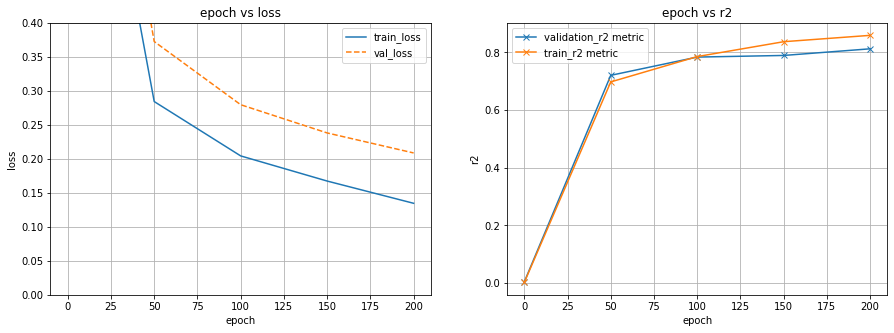

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 0.4)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_epoch, list_val_r2, marker='x', label='validation_r2 metric')
ax2.plot(list_epoch, list_train_r2, marker='x', label='train_r2 metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('r2')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs r2')


plt.show()

In [ ]:
cnnmodel.eval() #Swith to evaluation mode, where dropout is switched off
y_pred_train = cnnmodel(X_train)
y_pred_validation = cnnmodel(X_validation)
y_pred_test = cnnmodel(X_test)

In [ ]:
#test 데이터셋의 RMSE와 R2점수 구하기 
print("RMSE: {0:.3f}".format(torch.sqrt(torch.mean(( y_test - y_pred_test )**2)).item()))
print("r2_score: {0:.3f}".format(r2_score(y_test.detach().cpu().clone() , y_pred_test.detach().cpu().clone())))

RMSE: 0.555
r2_score: 0.749


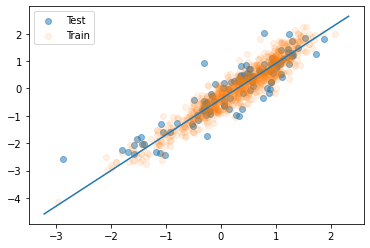

In [ ]:
def flatten(tensor):
    return tensor.cpu().detach().numpy().flatten()
    
plt.scatter(flatten(y_pred_test), flatten(y_test), alpha=0.5, label="Test")
plt.scatter(flatten(y_pred_train), flatten(y_train), alpha=0.1, label="Train")
plt.legend()

# Fit with polyfit
axes = plt.gca()
m, b = np.polyfit(flatten(y_pred_train), flatten(y_train), 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')
plt.show()

# Mol2Vec사용한 모델 구축

In [ ]:
#파이썬 외 외부 라이브러리 중 github의 라이브러리를 불러올때 아래와 같이 설치하면
#깃허브에 접속하면 설치법을 안내해줌
!pip install git+https://github.com/samoturk/mol2vec

  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-kg910g5o
  Created wheel for mol2vec: filename=mol2vec-0.1-py3-none-any.whl size=14025 sha256=e5ee5e929ea6c0c49481147900771b7efcb25baeace7b923f590682ff021d8f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-mz1vqncx/wheels/e1/f8/44/e7b5a66cec5932da508b308257d09bb5ac929b57e0641973f6
Successfully built mol2vec


## load to data

In [ ]:
!wget https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv

--2020-09-29 00:46:15--  https://raw.githubusercontent.com/deepchem/deepchem/master/datasets/delaney-processed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96699 (94K) [text/plain]
Saving to: ‘delaney-processed.csv.5’

delaney-processed.c 100%[===================>]  94.43K  --.-KB/s    in 0.02s   

2020-09-29 00:46:15 (4.71 MB/s) - ‘delaney-processed.csv.5’ saved [96699/96699]



In [ ]:
import pandas as pd
data = pd.read_csv("delaney-processed.csv")
data.head(1)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...


## Data Transform

,smiles,Molecule
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,

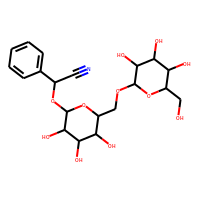

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
PandasTools.AddMoleculeColumnToFrame(data,'smiles','Molecule')
data[["smiles","Molecule"]].head(1)

In [ ]:
#mol2vec에 필요한 라이브러리와 함수들을 import
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
aas = [Chem.MolFromSmiles(x) for x in data["smiles"]]

In [ ]:
#mol2alt_sentence를 사용하여 문장으로 변환 문장 변환에는 identifier들이 생성됨
sentence=mol2alt_sentence(aas[0],1)
sentence

['864662311',
 '1535166686',
 '2245384272',
 '3153477100',
 '2976033787',
 '1916236386',
 '3189457552',
 '2667063169',
 '2976033787',
 '1286704427',
 '864674487',
 '1759589175',
 '2245384272',
 '3129492592',
 '2976033787',
 '1916236386',
 '3189457552',
 '2667063169',
 '2976033787',
 '1286704427',
 '864674487',
 '199163361',
 '2245273601',
 '3147100053',
 '2245900962',
 '869152089',
 '847433064',
 '2551483158',
 '3217380708',
 '3579962709',
 '3218693969',
 '951226070',
 '3218693969',
 '98513984',
 '3218693969',
 '98513984',
 '3218693969',
 '98513984',
 '3218693969',
 '951226070',
 '2976033787',
 '675765711',
 '864662311',
 '266675433',
 '2976033787',
 '675765711',
 '864662311',
 '266675433',
 '2976033787',
 '675765711',
 '864662311',
 '266675433',
 '2976033787',
 '675765711',
 '864662311',
 '266675433',
 '2976033787',
 '675765711',
 '864662311',
 '266675433',
 '2976033787',
 '675765711',
 '864662311',
 '266675433']

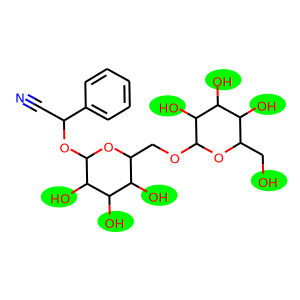

In [ ]:
#그 중 하나를 출력해보면 아래와 같다.
depict_identifier(aas[0], 864662311, 1)

In [ ]:
it = IdentifierTable(sentence, [aas[0]]*len(sentence), [sentence]*len(sentence), 5, 1)
it

In [ ]:
#word2vec모델을 사용하기 위해 gensim.models의 word2vec import
from gensim.models import word2vec

구글 드라이브에 데이터를 올리는 법: 아래의 그림

필요한 파일 model_300dim.pkl 위치 : https://github.com/samoturk/mol2vec/tree/master/examples/models

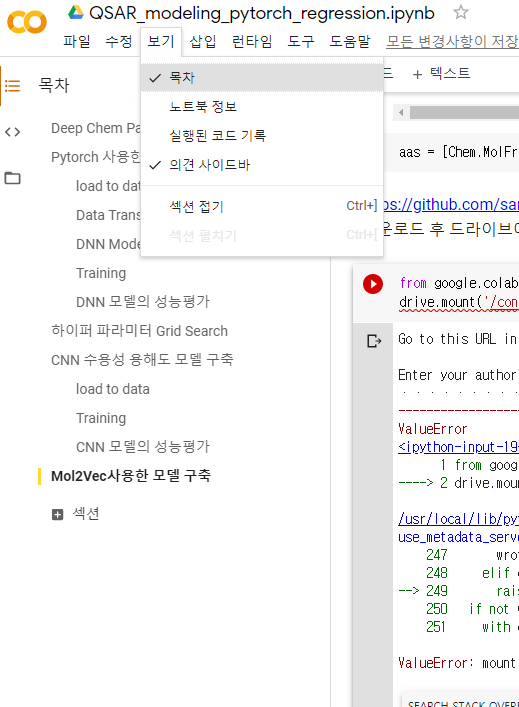

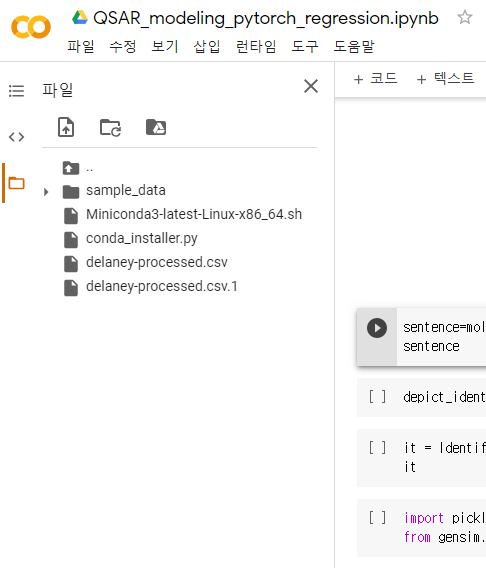

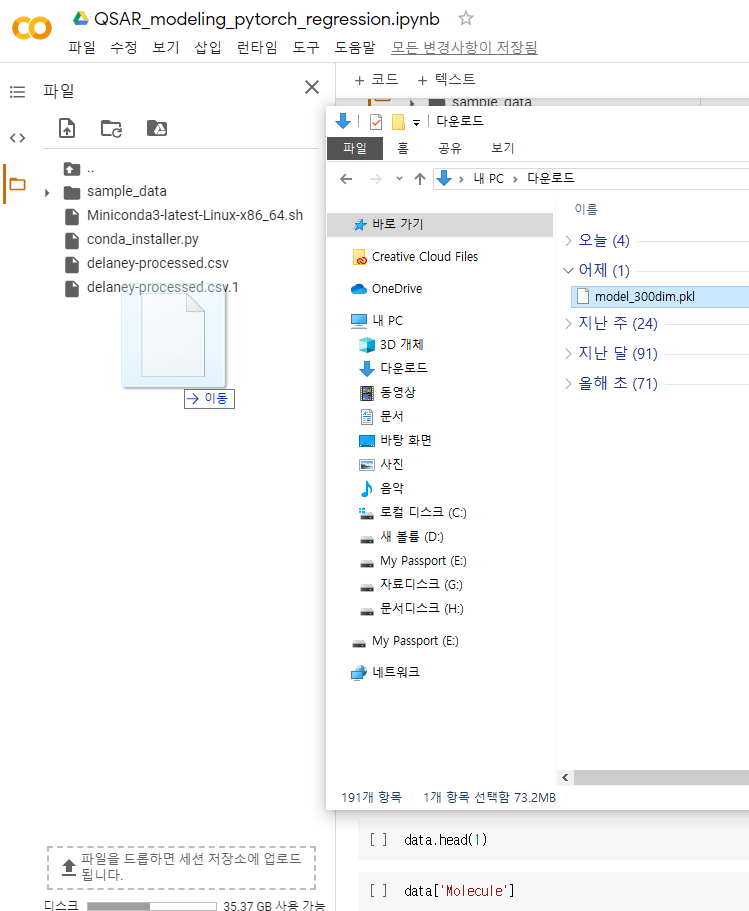

github에 있는 model_300dim.pkl을 한번에 받아오는 코드

In [ ]:
!wget https://raw.githubusercontent.com/samoturk/mol2vec/master/examples/models/model_300dim.pkl

--2020-09-29 00:46:17--  https://raw.githubusercontent.com/samoturk/mol2vec/master/examples/models/model_300dim.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76786055 (73M) [application/octet-stream]
Saving to: ‘model_300dim.pkl.1’

model_300dim.pkl.1  100%[===================>]  73.23M   107MB/s    in 0.7s    

2020-09-29 00:46:18 (107 MB/s) - ‘model_300dim.pkl.1’ saved [76786055/76786055]



In [ ]:
#wor2vec model에 이미 학습되었던 가중치 값을 불러옴
w2vmodel = word2vec.Word2Vec.load('model_300dim.pkl')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
#identifiers의 수
len(w2vmodel.wv.vocab.keys())

21003

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles,Molecule
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,

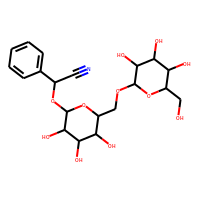

In [ ]:
data.head(1)

In [ ]:
#apply함수 적용
#차이점은 여러 단계로 진행되는 것을 apply함수 안에 넣은 것
#Mol object인 Molecule열을 mol2alt_sentence로 identifier들을 갖는 값으로 변경하고
#이를 다시 MolSentence함수를 사용하여 pandas Dataframe에 mol sentence를 저장할 수 있게 변환
data['sentence'] = data.apply(lambda x: MolSentence(mol2alt_sentence(x['Molecule'], 1)), axis=1)

In [ ]:
#이렇게 생성한 data의 sentence열의 정보들을 sentence2vec를 사용하여 mol2vec화함
data['mol2vec'] = [DfVec(x) for x in sentences2vec(data['sentence'], w2vmodel, unseen='UNK')]

,0
Compound ID,Amigdalin
ESOL predicted log solubility in mols per litre,-0.974
Minimum Degree,1
Molecular Weight,457.432
Number of H-Bond Donors,7
Number of Rings,3
Number of Rotatable Bonds,7
Polar Surface Area,202.32
measured log solubility in mols per litre,-0.77
smiles,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...

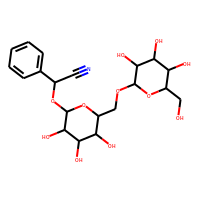

In [ ]:
#결과적으로 300차원의 벡터가 생성됨
data.head(1).T

In [ ]:
X = np.array([x.vec for x in data['mol2vec']])
y = data['measured log solubility in mols per litre'].values.reshape((-1,1))

In [ ]:
#sklearn의 train_test_splie함수를 사용하여 random하게 데이터를 나눔
#random_state=42로 고정 이 값을 변경할 경우 데이터의 구성이 바뀌니 기억해 둘것
#test_size=0.1로 1을 전체 데이터라고 가정했을때 전체 데이터의 10%를 테스트로 나머지 90% 훈련 데이터로 사용한다는 뜻
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
#splitd을 한번더 수행 이러한 이유는 valid 데이터를 수행하기 위함임 train 데이터의 10%를 valid 데이터로 생성
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.1, random_state=42)
#정규화 수행 [0,1]의 값으로 
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

In [ ]:
# gpu에서 학습
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
X_validation = torch.tensor(X_validation, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()
y_validation = torch.tensor(y_validation, device=device).float()
X_train

cuda:0


tensor([[  0.6398,   1.5559,  -1.5355,  ...,  -2.2593,  -3.9086,   0.4851],
        [ -1.5316,  -7.9163,  -6.0273,  ...,  -2.4850, -12.4975,   3.9382],
        [  0.9494,  -0.9584,  -0.5601,  ...,  -4.1352,  -6.4839,  -1.8985],
        ...,
        [ -1.5671,  -0.0286,  -0.9324,  ...,   1.1181,  -1.1595,  -1.1114],
        [ -1.1879,  -6.7705,  -6.3758,  ...,  -3.3778, -14.5161,  -0.0831],
        [  1.5110,  -3.0176,  -2.8297,  ...,  -4.9359,  -8.8553,  -2.0444]],
       device='cuda:0')

In [ ]:
print(X_train.shape, y_train.shape)

torch.Size([913, 300]) torch.Size([913, 1])


In [ ]:
#TensorDataset을 사용하여 입력과 출력 쌍을 묶어줌
#이는 torch의 데이터로더함수를 사용하여 batch크기만큼 입력 출력쌍을 주기 위함
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, y_train)

In [ ]:
#DataLoader를 사용하여 전체 train, valid 데이터를 배치크기로 분할하면서 섞어주는 작업을 수행함 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=256,
                                          shuffle=True)

In [ ]:
#하이퍼 파라미터 세팅
input_size = X_train.size()[-1]     # The input size should fit our fingerprint size
hidden_size = 1024   # The size of the hidden layer
dropout_rate = 0.2   # The dropout rate
output_size = 1        # This is just a single task, so this will be one
learning_rate = 0.0001  # The learning rate for the optimizer

vec_dnn_model = cudaMLPModel(input_size, hidden_size, dropout_rate, output_size)

In [ ]:
vec_dnn_model.cuda()

cudaMLPModel(
  (linear1): Linear(in_features=300, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (fc_out): Linear(in_features=1024, out_features=1, bias=True)
  (activation): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(vec_dnn_model.parameters(), lr=learning_rate)

## Training 

In [ ]:
from sklearn.metrics import r2_score

list_epoch = []
list_train_loss = []
list_val_loss = []
list_r2 = []
vec_dnn_model.train() #Ensure the network is in "train" mode with dropouts active
epochs = 200
for e in range(epochs+1):
    running_loss = 0
    for fps, labels in train_loader:
        # Training pass
        optimizer.zero_grad() # Initialize the gradients, which will be recorded during the forward pa
         
        output = vec_dnn_model(fps) #Forward pass of the mini-batch
        loss = criterion(output, labels) #Computing the loss
        loss.backward() # calculate the backward pass
        optimizer.step() # Optimize the weights
        running_loss += loss.item()
    else:
        if e%50 == 0:
            validation_loss = torch.mean(( y_validation - vec_dnn_model(X_validation) )**2).item()
            list_r2.append(r2_score(y_validation.detach().cpu(), vec_dnn_model(X_validation).detach().cpu()))
            list_epoch.append(e)
            list_train_loss.append(running_loss/len(train_loader))

            print("Epoch: %3i Training loss: %0.2F Validation loss: %0.2F"%(e,(running_loss/len(train_loader)), validation_loss))
            list_val_loss.append(validation_loss)

Epoch:   0 Training loss: 0.90 Validation loss: 0.84
Epoch:  50 Training loss: 0.09 Validation loss: 0.26
Epoch: 100 Training loss: 0.05 Validation loss: 0.21
Epoch: 150 Training loss: 0.03 Validation loss: 0.21
Epoch: 200 Training loss: 0.03 Validation loss: 0.18


## Mol2vec 모델의 성능평가

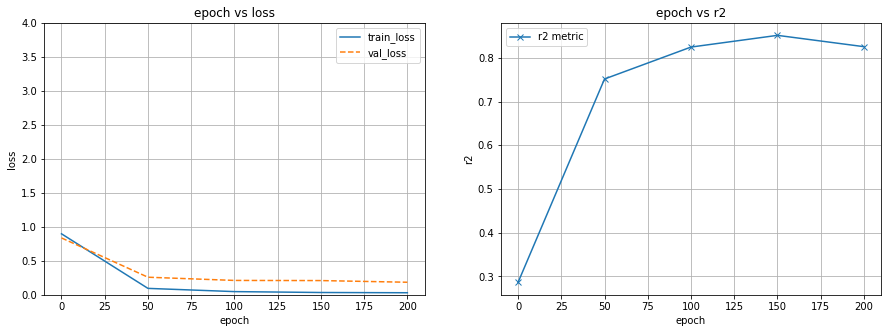

In [ ]:
fig = plt.figure(figsize=(15,5))

# ====== Loss Fluctuation ====== #
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_ylim(0, 4.0)
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# ====== Metric Fluctuation ====== #
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_epoch, list_r2, marker='x', label='r2 metric')

ax2.set_xlabel('epoch')
ax2.set_ylabel('r2')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs r2')


plt.show()

In [ ]:
#test 데이터셋의 RMSE와 R2점수 구하기 
print("RMSE: {0:.3f}".format(torch.sqrt(torch.mean(( y_test - y_pred_test )**2)).item()))
print("r2_score: {0:.3f}".format(r2_score(y_test.detach().cpu().clone() , y_pred_test.detach().cpu().clone())))

RMSE: 0.555
r2_score: 0.749


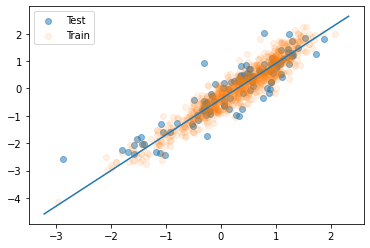

In [ ]:
def flatten(tensor):
    return tensor.cpu().detach().numpy().flatten()
    
plt.scatter(flatten(y_pred_test), flatten(y_test), alpha=0.5, label="Test")
plt.scatter(flatten(y_pred_train), flatten(y_train), alpha=0.1, label="Train")
plt.legend()
# Fit with polyfit
axes = plt.gca()
m, b = np.polyfit(flatten(y_pred_train), flatten(y_train), 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-')
plt.show()